# Radix sort

Este algoritmo toma un camino curioso para ordenar una lista de números. Lo que hace es ordenar cada columna de dígitos como se ve en la siguiente imagen. Primero se ordena por la columna con los números [9, 7, 7, 9, 6, 0, 5]. Luego, se ordena por la columna con los números [2, 5, 3, 5, 5, 2, 3] y por último, por la que tiene los números [7, 3, 4, 8, 3, 4, 6]

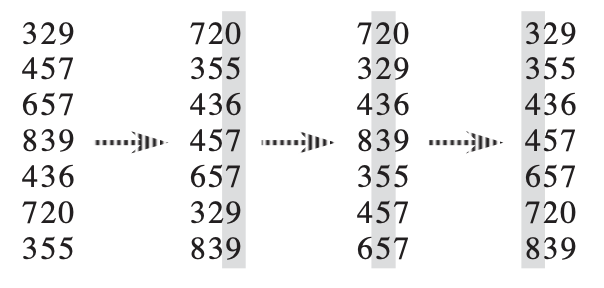

El pseudocódigo de este algoritmo es bastante sencillo.

![./img/radix_sort_2.png](attachment:radix_sort_2.png)

Lo que salta a la vista es se necesita un algoritmo de ordenamiento "estable" para columna. Un algoritmo de este estilo es aquel que mantiene los elementos en su misma posición relativa. Supongamos que tenemos una lista de palabras de 5 letras:

1. peach
2. straw
3. apple
4. spork

Si ordenamos por la primera letra, un algoritmo estable producirá la siguiente salida:

1. apple
2. peach
3. straw
4. spork

En un algoritmo de ordenamiento "inestable", se podrían intercambiar straw y spork, pero en uno estable, permanecen en las mismas posiciones relativas (es decir, dado que straw aparece antes que spork en la entrada, también aparece antes que spork en la salida).

Para esta implementación de radix sort usaremos el algoritmo estable counting sort, que ya ha sido explicado en documentos previos.

In [3]:
def counting_sort_para_radix(A, lugar_valor, imprimir=False):
    arreglo_de_conteo = [0] * 10
    largo_arreglo = len(A)

    for i in range(largo_arreglo): 
        lugar_elemento = (A[i] // lugar_valor) % 10
        arreglo_de_conteo[lugar_elemento] += 1

    for i in range(1, 10):
        arreglo_de_conteo[i] += arreglo_de_conteo[i-1]

    # Reconstruir el arreglo de salida
    arreglo_de_salida = [0] * largo_arreglo
    i = largo_arreglo - 1

    while i >= 0:
        elemento_actual = A[i]
        lugar_elemento = (A[i] // lugar_valor) % 10
        arreglo_de_conteo[lugar_elemento] -= 1
        nueva_posicion = arreglo_de_conteo[lugar_elemento]
        arreglo_de_salida[nueva_posicion] = elemento_actual
        i -= 1
        
    if imprimir:
        print(A)
        
    return arreglo_de_salida

Ahora sí podemos usar counting_sort para ordenar cada columna en radix_sort

In [9]:
def radix_sort(A, d, imprimir=False):
    # Paso 1: Guardar el número de dígitos en el elemento más grande
    D = d

    # Paso 3: Inicializar en el dígito menos significativo
    lugar_valor = 1

    # Paso 4: Ordenar para todos los dígitos
    arreglo_salida = A
    
    while D > 0:
        arreglo_salida = counting_sort_para_radix(arreglo_salida, lugar_valor, imprimir=imprimir)
        lugar_valor *= 10  
        D -= 1

    return arreglo_salida

### Loop invariante
Al inicio de cada ciclo, el arreglo está ordenado en los últimos i - 1 dígitos.

### Prueba

1. Inicialización
El arreglo está ordenado en los últimos 0 dígitos.

2. Mantenimiento
Asumiendo que el arreglo está ordenado en los últimos i - 1 dígitos. Después de que ordenamos en el dígito i-ésimo, el arreglo estará ordenado en los últimos i dígitos. 

3. Finalización
El ciclo termina cuando i = d + 1. Como se mantiene el loop invariante, los números están ordenados en los d dígitos.

### Probando el algoritmo
Ahora probamos el algoritmo radix_sort con un arreglo de ejemplo.

In [13]:
A = [329, 457, 657, 839, 436, 720, 355]

sorted = radix_sort(A, 3, imprimir=True)
print(sorted)

[329, 457, 657, 839, 436, 720, 355]
[720, 355, 436, 457, 657, 329, 839]
[720, 329, 436, 839, 355, 457, 657]
[329, 355, 436, 457, 657, 720, 839]


### Probando el tiempo de ejecución
Radix sort tiene un tiempo de ejecución O(d(n + k)) si el algoritmo de ordenamiento estable se ejecuta en un tiempo de ejecución O(n + k) y este es el caso para counting sort. En este caso probaremos con 3 dígitos.

In [14]:
import numpy
from matplotlib import pyplot
import time
import random

# Este método genera un arreglo de elementos aleatorios de 100 a 999
def generar_arreglo(largo):
    return [random.randint(100, 999) for x in range(0, largo)]

# Este método genera n arreglos, mide el tiempo de ejecución y lo promedia
def probar_radix_sort(n, n_arreglos=1):
    arreglos = [generar_arreglo(n) for x in range(0, n_arreglos)]
    contador_tiempo_ejecucion = 0
    
    for arreglo in arreglos:
        tiempo_inicial = time.time()
        radix_sort(arreglo, 3)
        tiempo_ejecucion = time.time() - tiempo_inicial
        contador_tiempo_ejecucion += tiempo_ejecucion
        
    return contador_tiempo_ejecucion/n_arreglos

# Este método grafica una serie de tiempos de ejecución
def graficar_series(tiempos_de_ejecucion):
    valores = {}
    
    for tiempo_de_ejecucion in tiempos_de_ejecucion:
        if tiempo_de_ejecucion[0] not in valores:
            valores[tiempo_de_ejecucion[0]] = [(tiempo_de_ejecucion[2])]
        else:
            valores[tiempo_de_ejecucion[0]].append(tiempo_de_ejecucion[2])
    
    for key, value in valores.items():
        pyplot.plot(value, markersize=20,label=key)

    pyplot.legend()
    pyplot.show()

In [15]:
# Ahora generamos tiempos de ejecución para nuestra implementación de radix sort con 3 dígitos
tiempos_de_ejecucion = []

for i in range(1, 10000):
    tiempo = probar_radix_sort(i)
    tiempos_de_ejecucion.append(['implementacion', i, tiempo])

print(tiempos_de_ejecucion)

[['implementacion', 1, 1.811981201171875e-05], ['implementacion', 2, 1.3828277587890625e-05], ['implementacion', 3, 1.621246337890625e-05], ['implementacion', 4, 2.7894973754882812e-05], ['implementacion', 5, 2.002716064453125e-05], ['implementacion', 6, 2.09808349609375e-05], ['implementacion', 7, 2.288818359375e-05], ['implementacion', 8, 2.4080276489257812e-05], ['implementacion', 9, 2.6941299438476562e-05], ['implementacion', 10, 2.7894973754882812e-05], ['implementacion', 11, 3.2901763916015625e-05], ['implementacion', 12, 3.0994415283203125e-05], ['implementacion', 13, 3.314018249511719e-05], ['implementacion', 14, 3.3855438232421875e-05], ['implementacion', 15, 3.5762786865234375e-05], ['implementacion', 16, 5.91278076171875e-05], ['implementacion', 17, 6.198883056640625e-05], ['implementacion', 18, 6.318092346191406e-05], ['implementacion', 19, 6.604194641113281e-05], ['implementacion', 20, 6.794929504394531e-05], ['implementacion', 21, 7.772445678710938e-05], ['implementacion'

En la siguiente imagen se ve el tiempo de ejecución para nuestro algoritmo. El eje **x** son el número de elementos en la lista y el eje **y** son los segundos de ejecución.

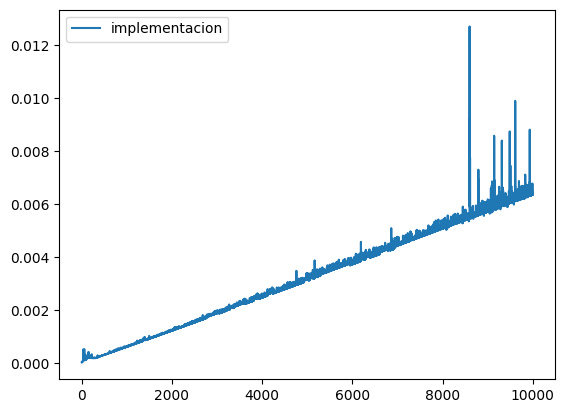

In [16]:
graficar_series(tiempos_de_ejecucion)

Ahora grafiquemos el tiempo teórico O(d(n + k)) con d = 3 y k = 899

In [19]:
def tiempo_de_ejecucion_teorico(n):
    arreglo = generar_arreglo(n)
    min_num = min(arreglo)
    max_num = max(arreglo)
    
    return 3 * (n + (max_num - min_num))

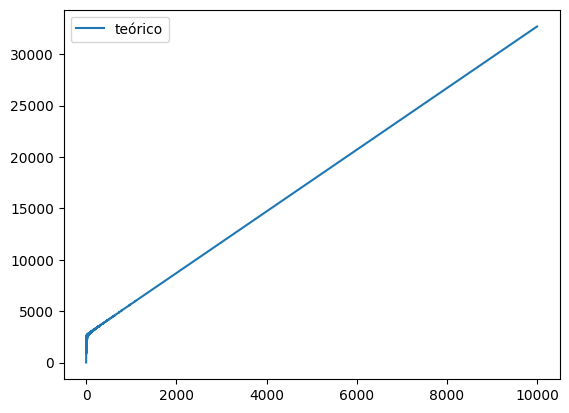

In [20]:
tiempos_de_ejecucion_teoricos = []

for i in range(1, 10000):
    tiempo = tiempo_de_ejecucion_teorico(i)
    tiempos_de_ejecucion_teoricos.append(['teórico', i, tiempo])
    
graficar_series(tiempos_de_ejecucion_teoricos)